# Personal Project #1: <i> Stats on California Housing Year: <b>1990</b> </i> 

In [56]:
#importing all necessary packages for this personal project
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_california_housing

##### <i> for reference, the stats were provided from https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html </i>

In [57]:
#loading california housing dataset
housing = fetch_california_housing(as_frame=True)
#converting the data set as dataframe for easy access
df = housing['data'].join(housing['target'])

In [58]:
df#displaying data frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [59]:
df.head(10) # let us see the first 10 rows

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [60]:
df.tail(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20630,3.5673,11.0,5.932584,1.134831,1257.0,2.824719,39.29,-121.32,1.120
20631,3.5179,15.0,6.145833,1.141204,1200.0,2.777778,39.33,-121.40,1.072
20632,3.1250,15.0,6.023377,1.080519,1047.0,2.719481,39.26,-121.45,1.156
20633,2.5495,27.0,5.445026,1.078534,1082.0,2.832461,39.19,-121.53,0.983
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


### Making a Pairplot for all the Features against Median Income in California

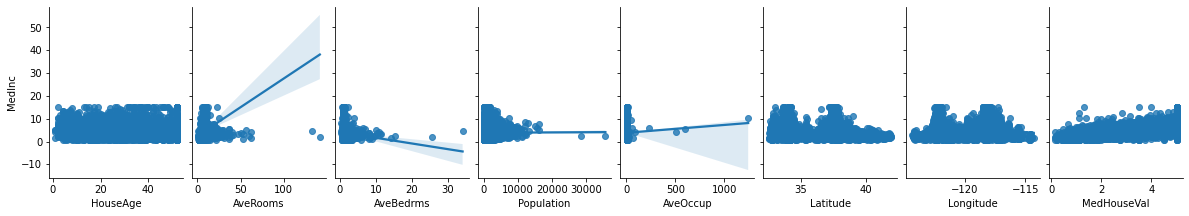

In [61]:
plt.figure
sns.pairplot(df,x_vars=['HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','MedHouseVal'],y_vars='MedInc',height=3,aspect=0.7,kind='reg')#making a pair plot for the features (x) and median income (y)

In [62]:
#as we can see some aspects of the features against the median income has no correlations and therefore irrelevant, i will try to narrow it down based on the visualization above

### Heat Map

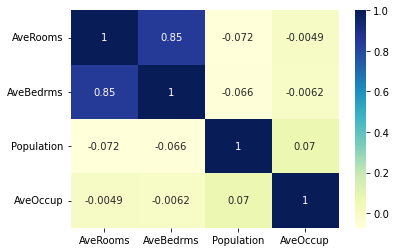

In [63]:
sns.heatmap(X.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Feature Selection 

In [64]:
features=['AveRooms','AveBedrms','Population','AveOccup']#these are the features that I narrowed it down
X=df[features]
X=df[['AveRooms','AveBedrms','Population','AveOccup']]
X.shape #as you can see I narrowed down from 8 features to 4!

(20640, 4)

In [65]:
y=df['MedInc']#median income identified as (y)
y.shape

(20640,)

## Simple Linear Regression Model

In [66]:
#random stae of 42 with test size of 20 percent and training 80 percent
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [67]:
X_train.shape,X_test.shape,
#the training data contains 80 percent of the data while the testing data contains 20 percent on the four features

((16512, 4), (4128, 4))

In [68]:
linear_reg_model = linear_model.LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred = linear_reg_model.predict(X_test)
print("Mean squared error of the model is : {MSE:.2f}" .format(MSE= mean_squared_error(y_test, y_pred)))
print("Coefficient of determination (R-squared) is:{r2}".format (r2=r2_score(y_test, y_pred)))

Mean squared error of the model is : 1.98
Coefficient of determination (R-squared) is:0.44033216136518183


In [69]:
#it looks like the r^2 value isn't great on this dataset when comparing the remaining features

## Plotting Simple Linear Regression Model

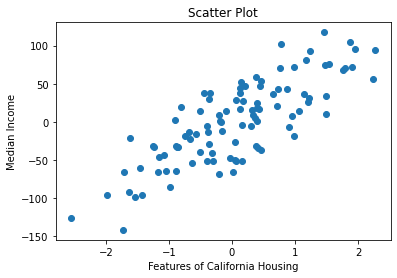

In [70]:
X_train, y_train = make_regression(n_samples=100, n_features=1, noise=30,random_state=0)#adding some noise to the linear regression model against training model
plt.scatter(X_train,y_train)
plt.title('Scatter Plot')
plt.xlabel('Features of California Housing')
plt.ylabel('Median Income') 
plt.show()

### Feature Importance 

Feature: 0, Score: 1.05
Feature: 1, Score: -5.16
Feature: 2, Score: 0.00
Feature: 3, Score: 0.00


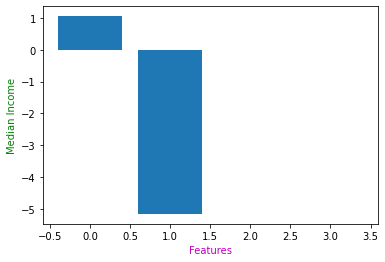

In [71]:
# get importance
feature_importance_ = linear_reg_model.coef_
# summarize feature importance
for i,j in enumerate(feature_importance_):
    print('Feature: %0d, Score: %.2f' % (i,j))
# plot feature importance
plt.bar([x for x in range(len(feature_importance_))], feature_importance_)
plt.xlabel('Features',c='m')
plt.ylabel('Median Income',c='g')
plt.show()

In [72]:
#it looks like [Average # of Rooms] in a House in California is directly correlated with Median Income